1. function to plot the density plot of 

In [1]:
import os
import pandas as pd
from gradient_to_kappa import gradient, kappa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


dest_dir = os.path.join("/Users/psuroyo/Downloads/Noise_trim",'kappa_store')
dirsta = os.path.join(dest_dir,'fas_allrec')




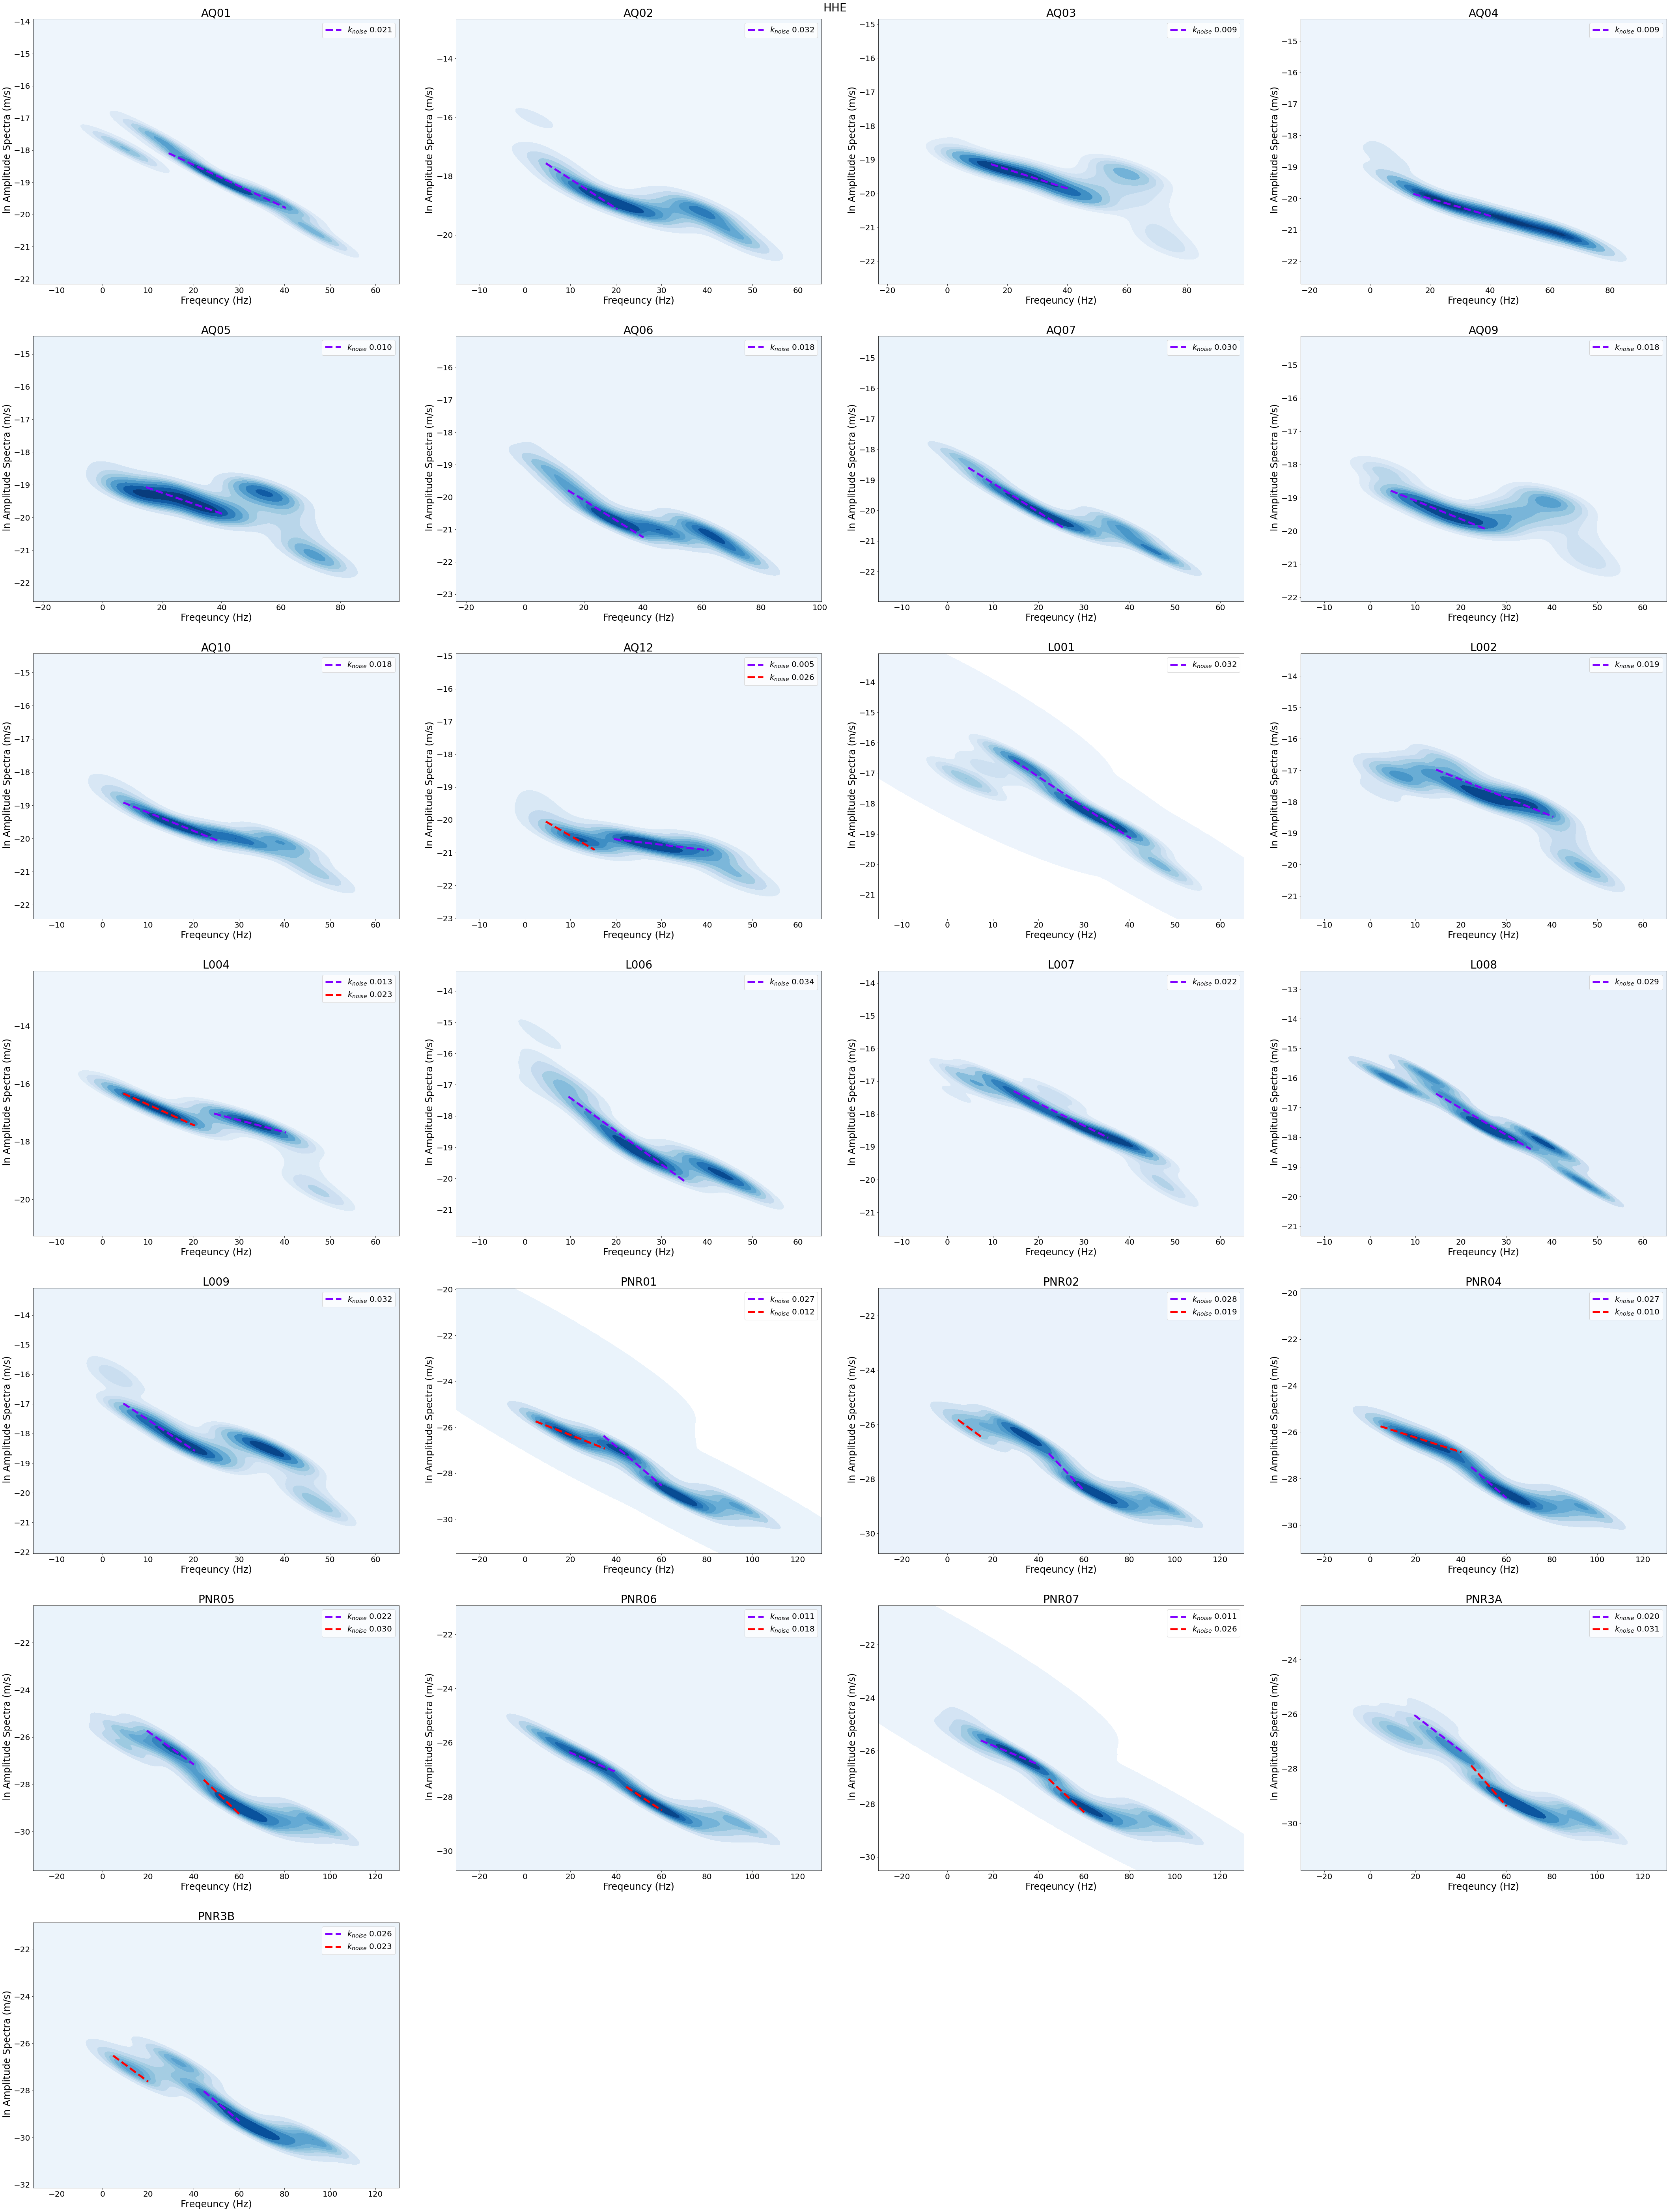

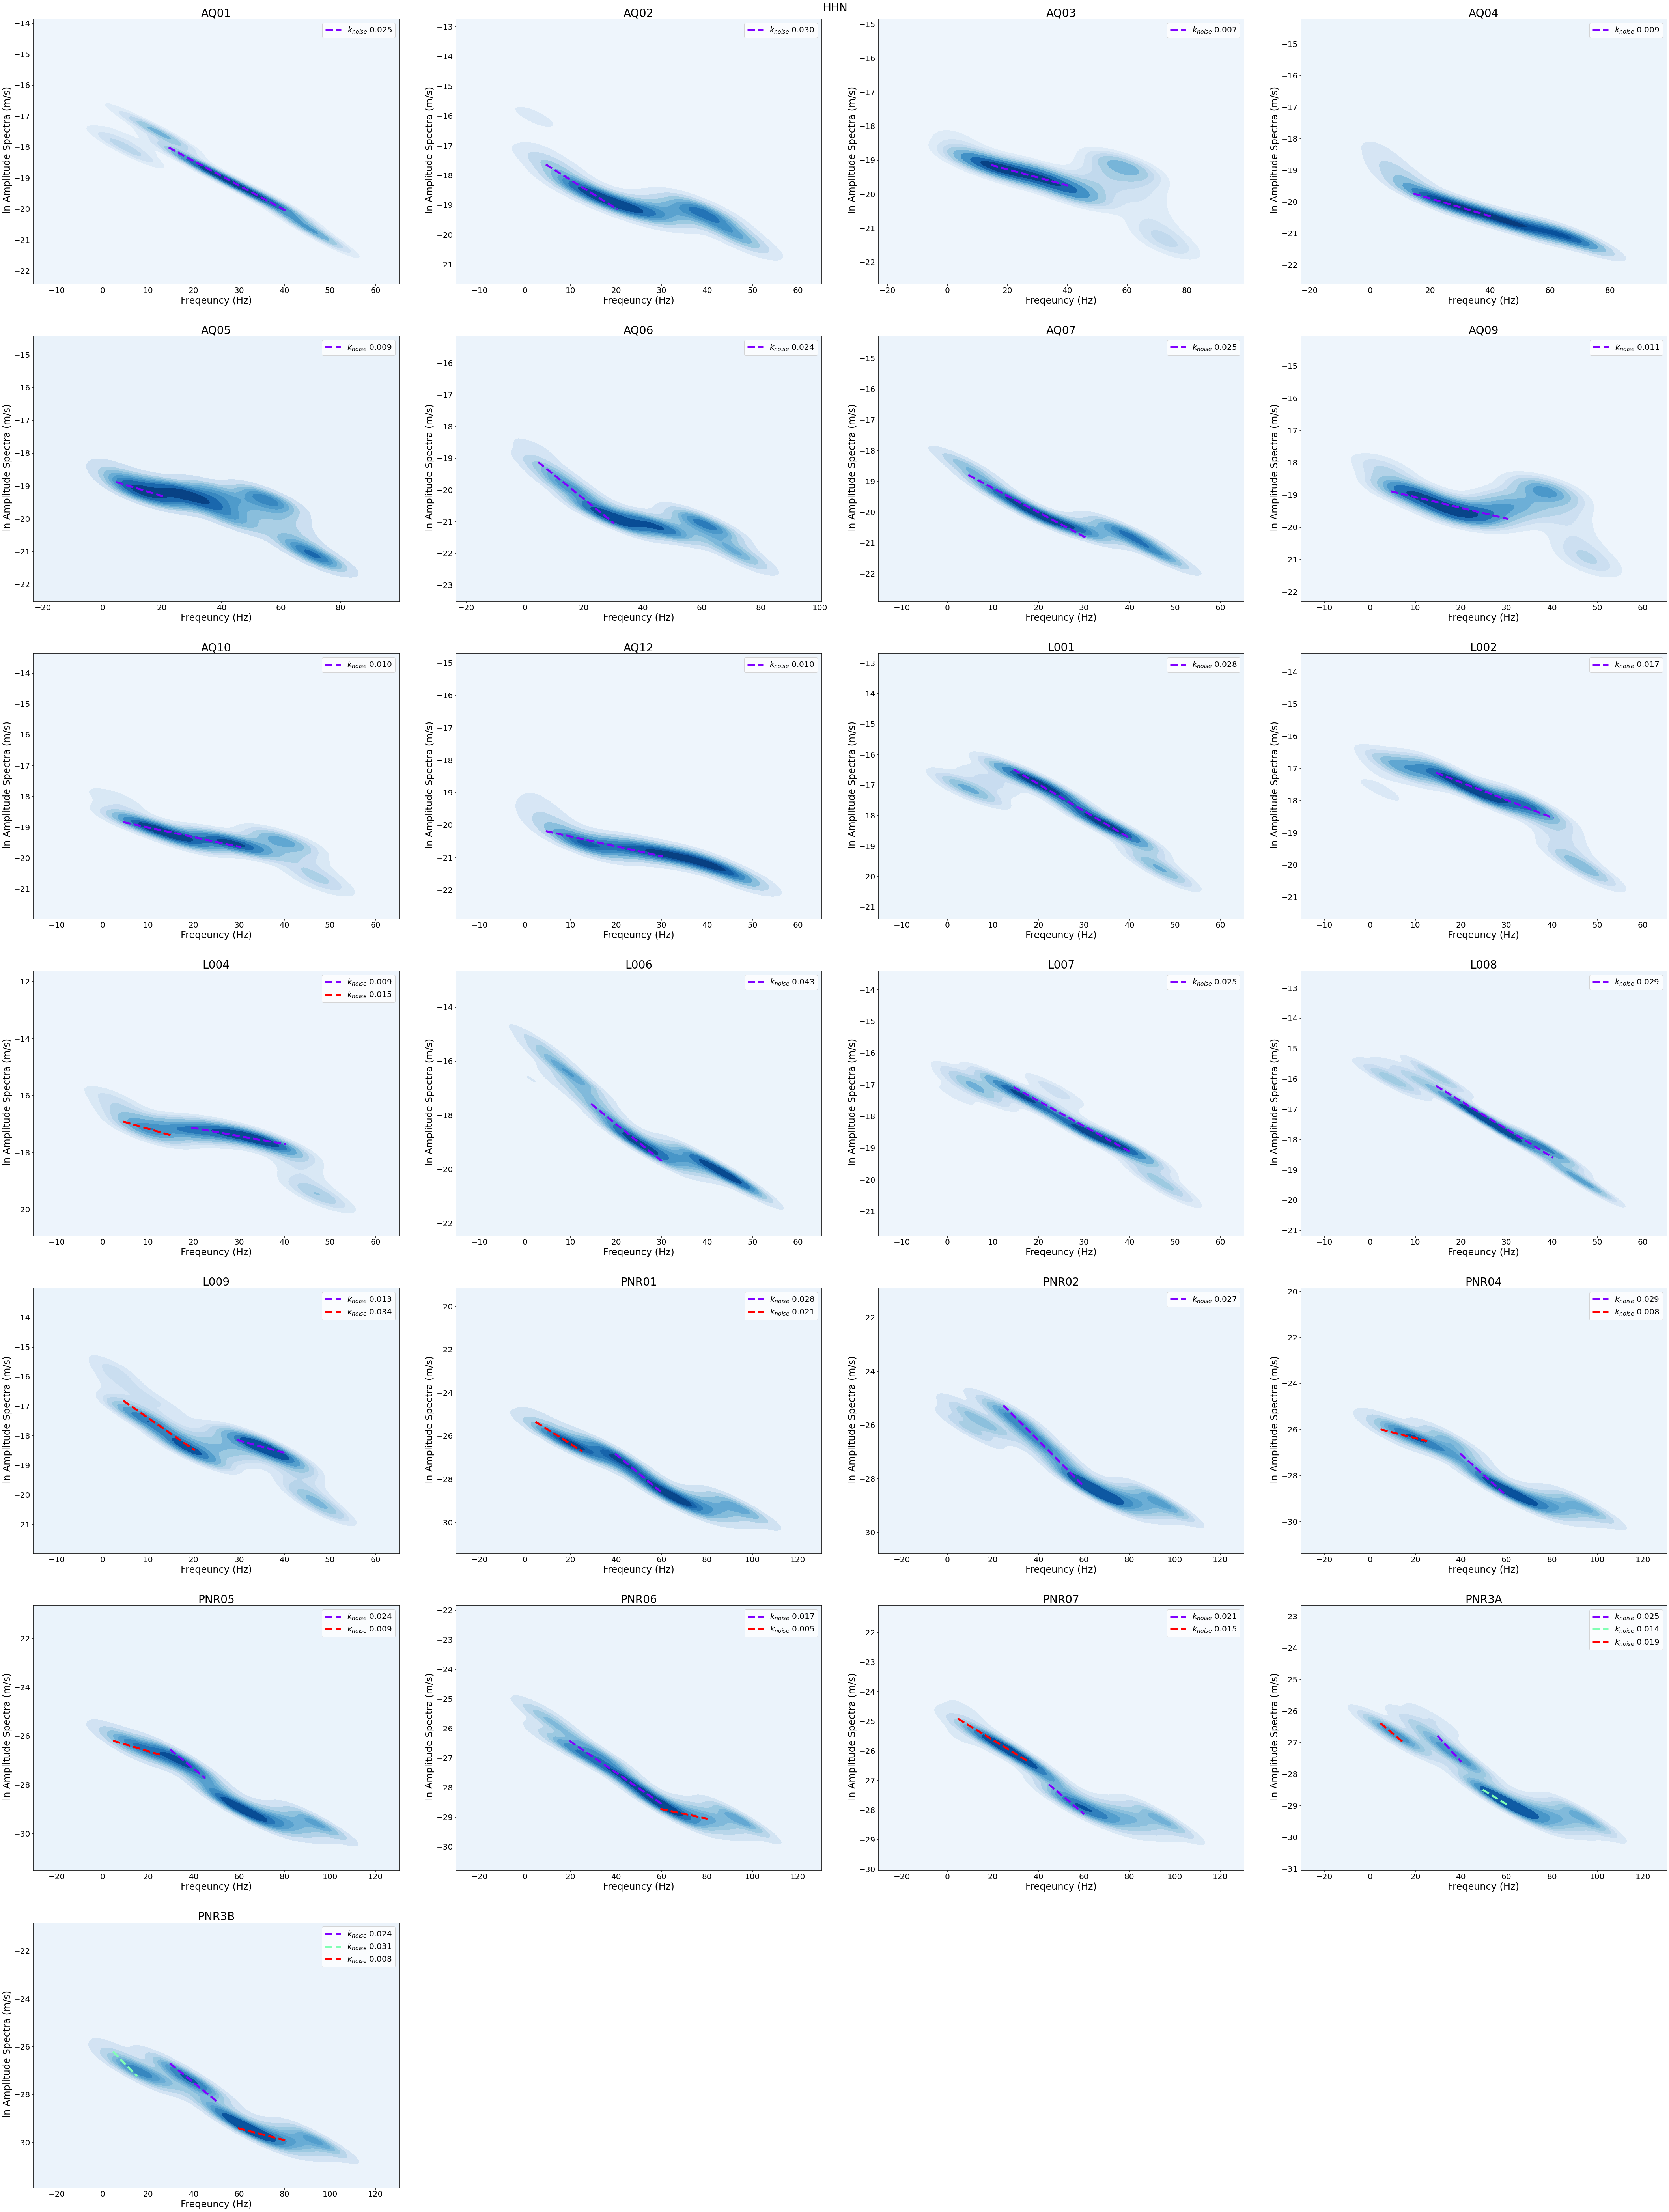

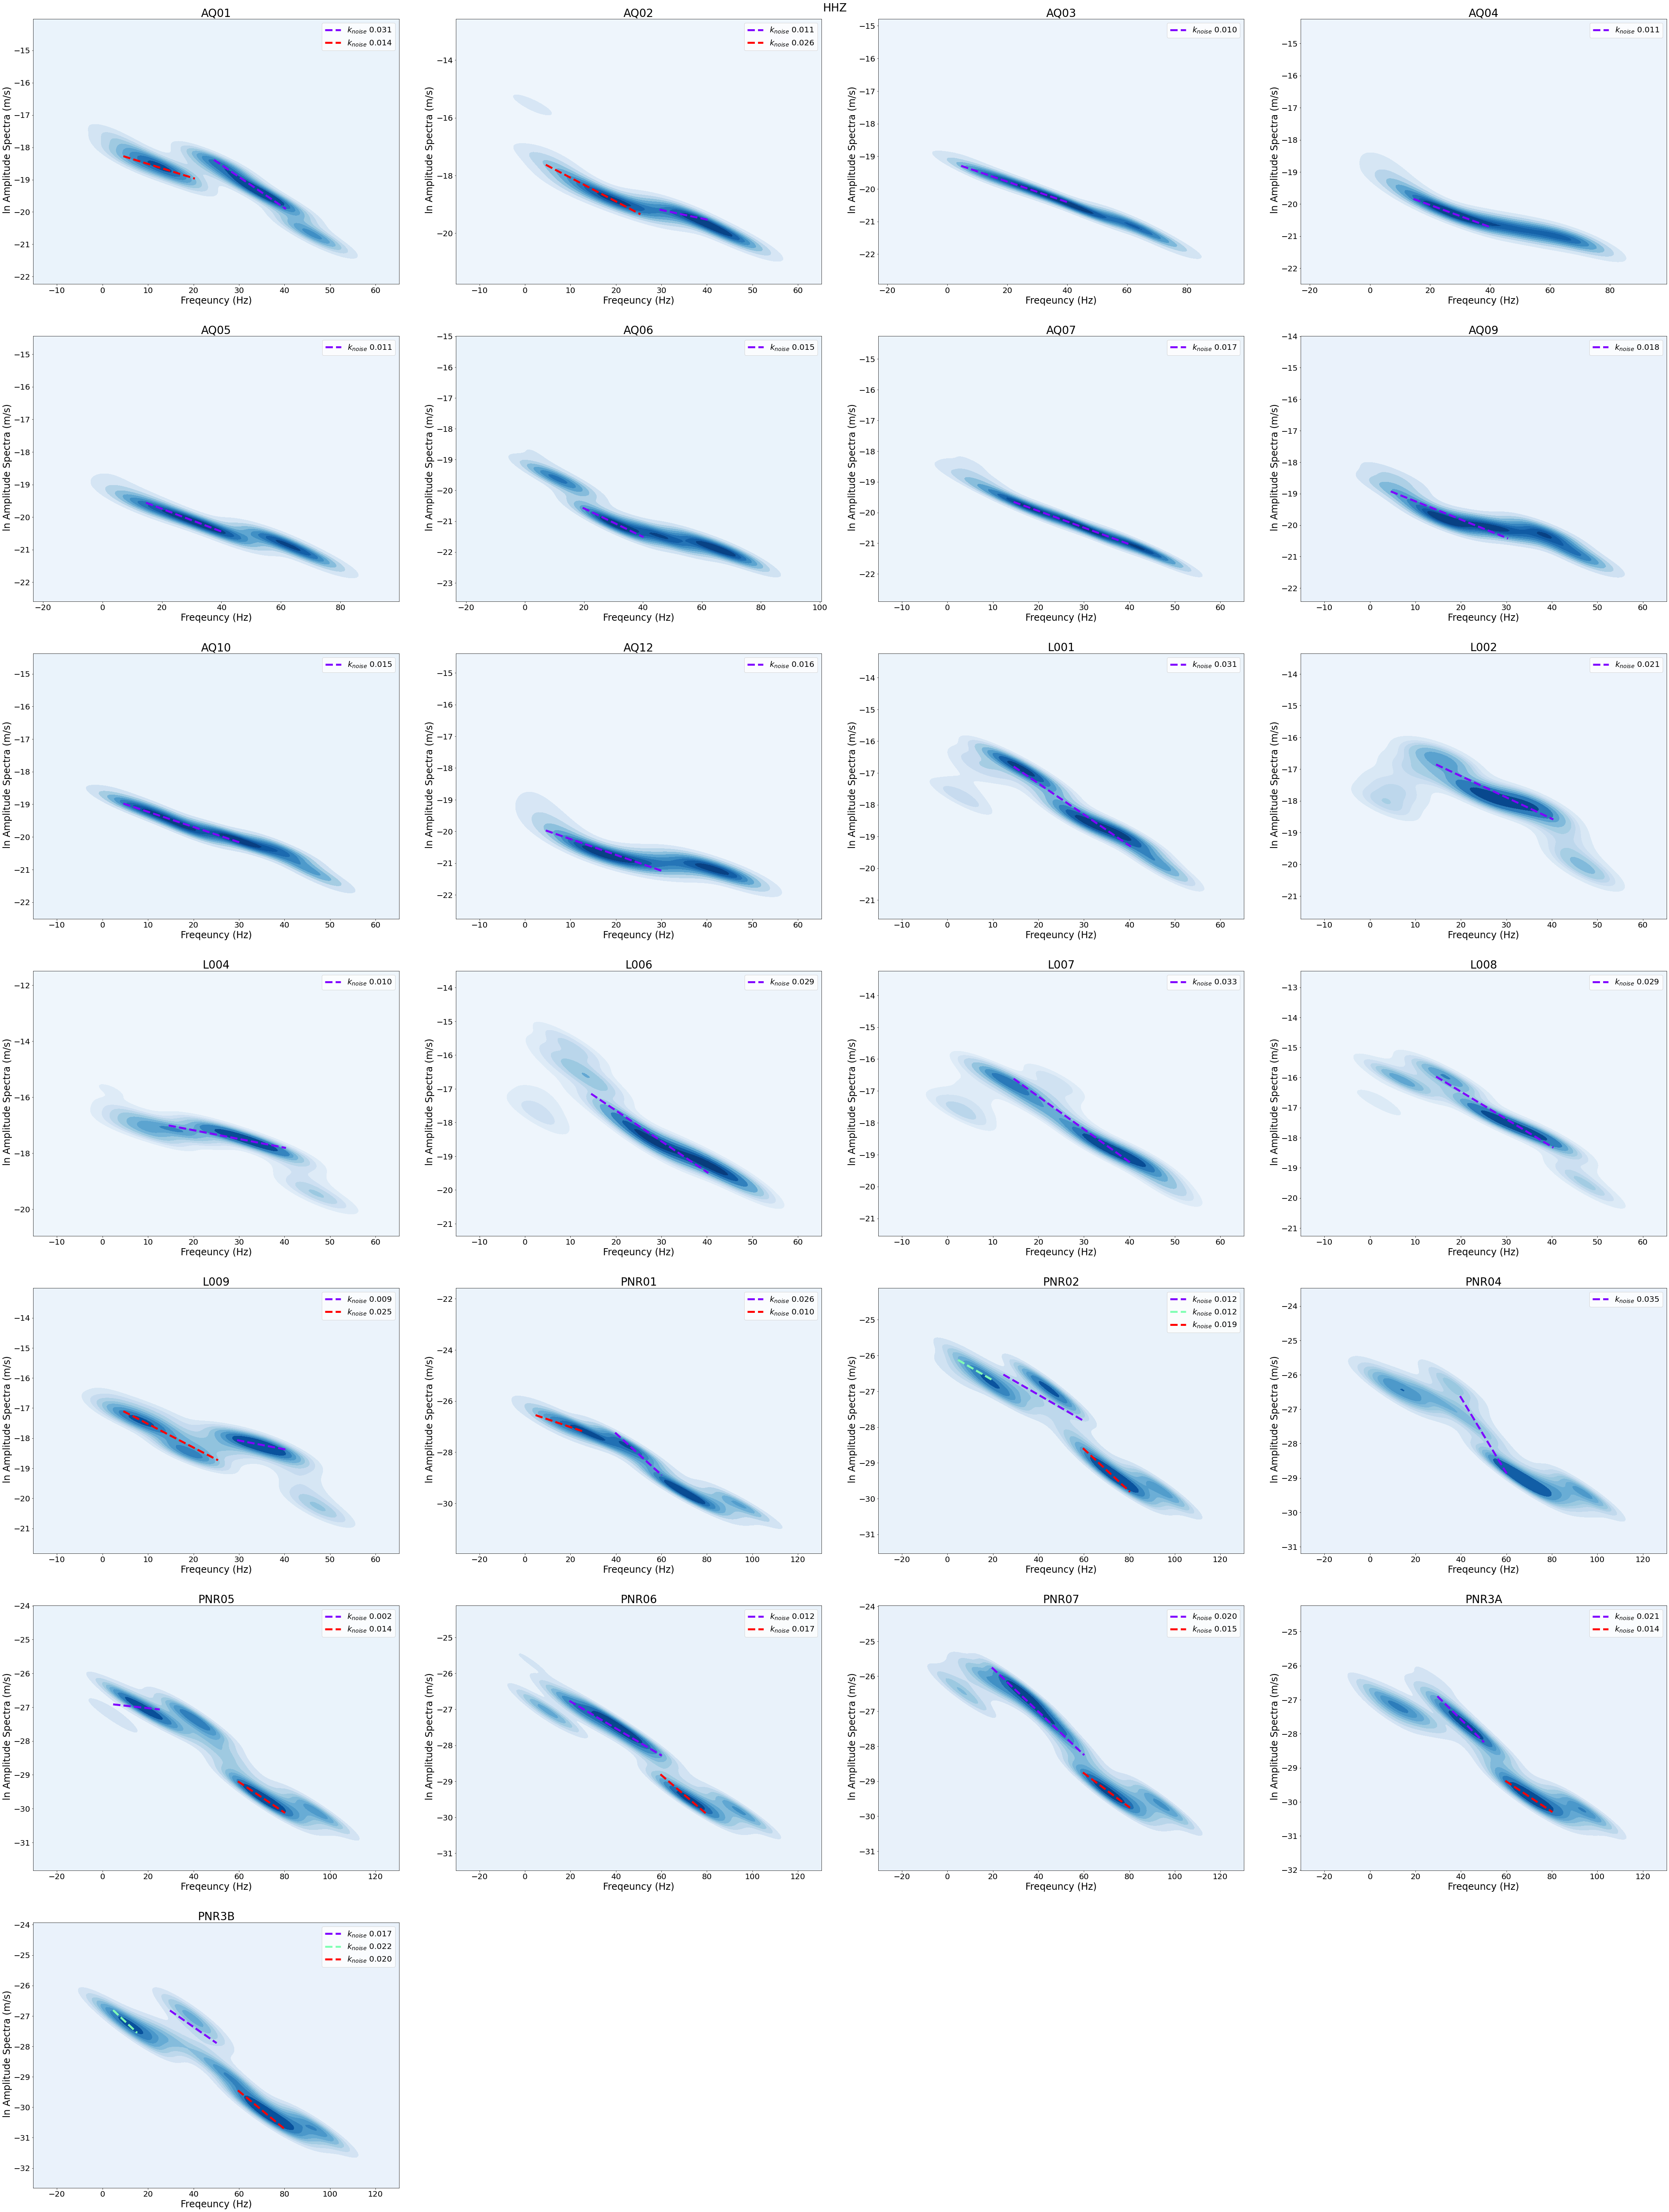

In [32]:

chan =['HHE','HHN','HHZ']
# chan =['HHE','HHN']
k0=[]

for cha in chan:

    #list of sta 
    list_sta = [f for f in os.listdir(dirsta)]
    list_sta_cha = [f for f in list_sta if cha in f]
    sta = [f.split('.')[0] for f in list_sta_cha]
    upperf = [(f.split('.')[3]).split('_')[0] for f in list_sta_cha]
    lowerf = [(f.split('.')[3]).split('_')[1] for f in list_sta_cha]
    dsta =pd.DataFrame({'filename': list_sta_cha, 'sta':sta, 'uf':upperf,'lf':lowerf})
    dsta = dsta.sort_values(by=['filename'])
    newlist_sta = dsta.drop_duplicates(subset=['sta'])
#     newlist_sta = [f for f in newlist_sta.sta if not f.startswith('PNR') ]
    newlist_sta = newlist_sta.sta

    fig = plt.figure(figsize=(60, 80))
    plt.subplots_adjust(hspace= 1,wspace = .8)

    for i, station in enumerate(newlist_sta):
        # add a new subplot iteratively
        ax = plt.subplot(int(len(newlist_sta)/4)+1, 4, i + 1)
        d = dsta[dsta.sta==station]
        d = d.reset_index(drop=True)
        color = iter(cm.rainbow(np.linspace(0, 1, len(d))))
        for n in range(len(d)):
            c = next(color)
            file = pd.read_csv(os.path.join(dirsta,d.filename[n]))
            nfas = file.avg_fas
            f = file.f
            coef1,poly1, x1, y1 = gradient (int(d.uf[n]), int(d.lf[n]), np.log(nfas),f)
            k = kappa(coef1[0]) 
            k0.append(k)
            pols=np.poly1d([-k *(np.pi),coef1[1]])
            ax.plot(x1, (pols(x1)),c=c,linestyle='--',linewidth=5., label='$k_{noise}$ '+"{:.3f}".format(abs(k)))

        sns.kdeplot(f, np.log(nfas), cmap="Blues", shade=True, thresh=0,ax=ax)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.legend(loc='upper right', fontsize= 20)
        ax.set_title(station, fontsize = 28)
        ax.tick_params(labelsize=20)
        ax.set_ylabel(" ln Amplitude Spectra (m/s)",fontsize=24)
        ax.set_xlabel("Freqeuncy (Hz)",fontsize=24)
    # fig.text(0.5, 0.02, 'Frequency (Hz)',fontsize=18, ha='center')
    # fig.text(0.04, 0.5, 'log Amplitude spectra (m)- Normalised', fontsize=18,va='center', rotation='vertical')

#     fig.supylabel(" log Amplitude spectra (m)",fontsize=26)
#     fig.supxlabel("Freq (Hz)",fontsize=26)
    # pylab.rcParams['xtick.major.pad']='8'
    fig.suptitle(cha,fontsize=28)
    plt.tight_layout(pad=5)
    plt.show()
    fig.savefig(os.path.join(dest_dir,'figure3_'+str(cha)+'.png'))


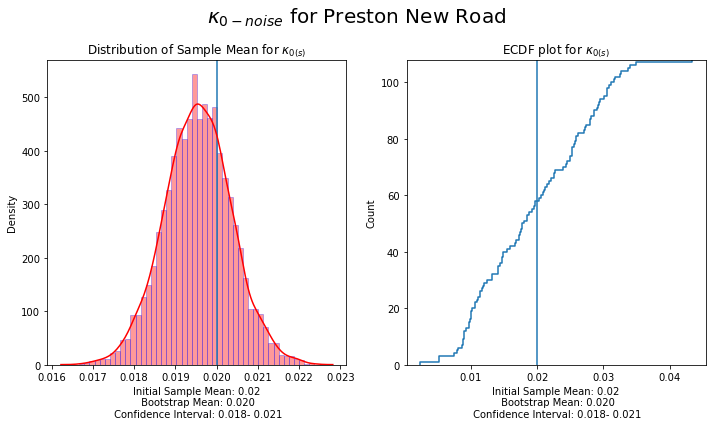

In [44]:
import numpy as np
import matplotlib
import seaborn as sns


# v = [abs(f) for f in k0]
v= k0
xbar_init = np.round(np.mean(v), 3)
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=False)
# generate 5000 resampled sample means  =>
means = [np.mean(np.random.choice(v,size=len(v),replace=True)) for i in range(5000)]
lower_ci = np.quantile(means, 0.025)
upper_ci = np.quantile(means, 0.975)
lower_ci, upper_ci
ax[0].set_xlabel("Initial Sample Mean: {:.3f}".format(xbar_init))
ax[0].set_title("Distribution of Sample Mean for $\kappa_{0(s)}$")
ax[0].axvline(x=xbar_init) # vertical line at xbar_init
sns.distplot(means, color='r', kde=True, hist_kws=dict(edgecolor="b", linewidth=.675),ax=ax[0])
ax[1].set_xlabel("Initial Sample Mean: {}\n Bootstrap Mean: {:.3f}\n Confidence Interval: {:.3f}- {:.3f}".format(xbar_init,
                                                                                                                np.mean(means),
                                                                                                                lower_ci, upper_ci))
ax[0].set_xlabel("Initial Sample Mean: {}\n Bootstrap Mean: {:.3f}\n Confidence Interval: {:.3f}- {:.3f}".format(xbar_init,
                                                                                                                np.mean(means),
                                                                                                                lower_ci, upper_ci))
ax[1].set_title("ECDF plot for $\kappa_{0(s)}$")
ax[1].axvline(x=xbar_init) # vertical line at xbar_init
sns.ecdfplot(data=v,stat="count",ax=ax[1])

plt.suptitle('$\kappa_{0-noise}$ for Preston New Road',fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(dest_dir,'figure4.png'))

# DOES IT VARIES WITH COMPONENT?

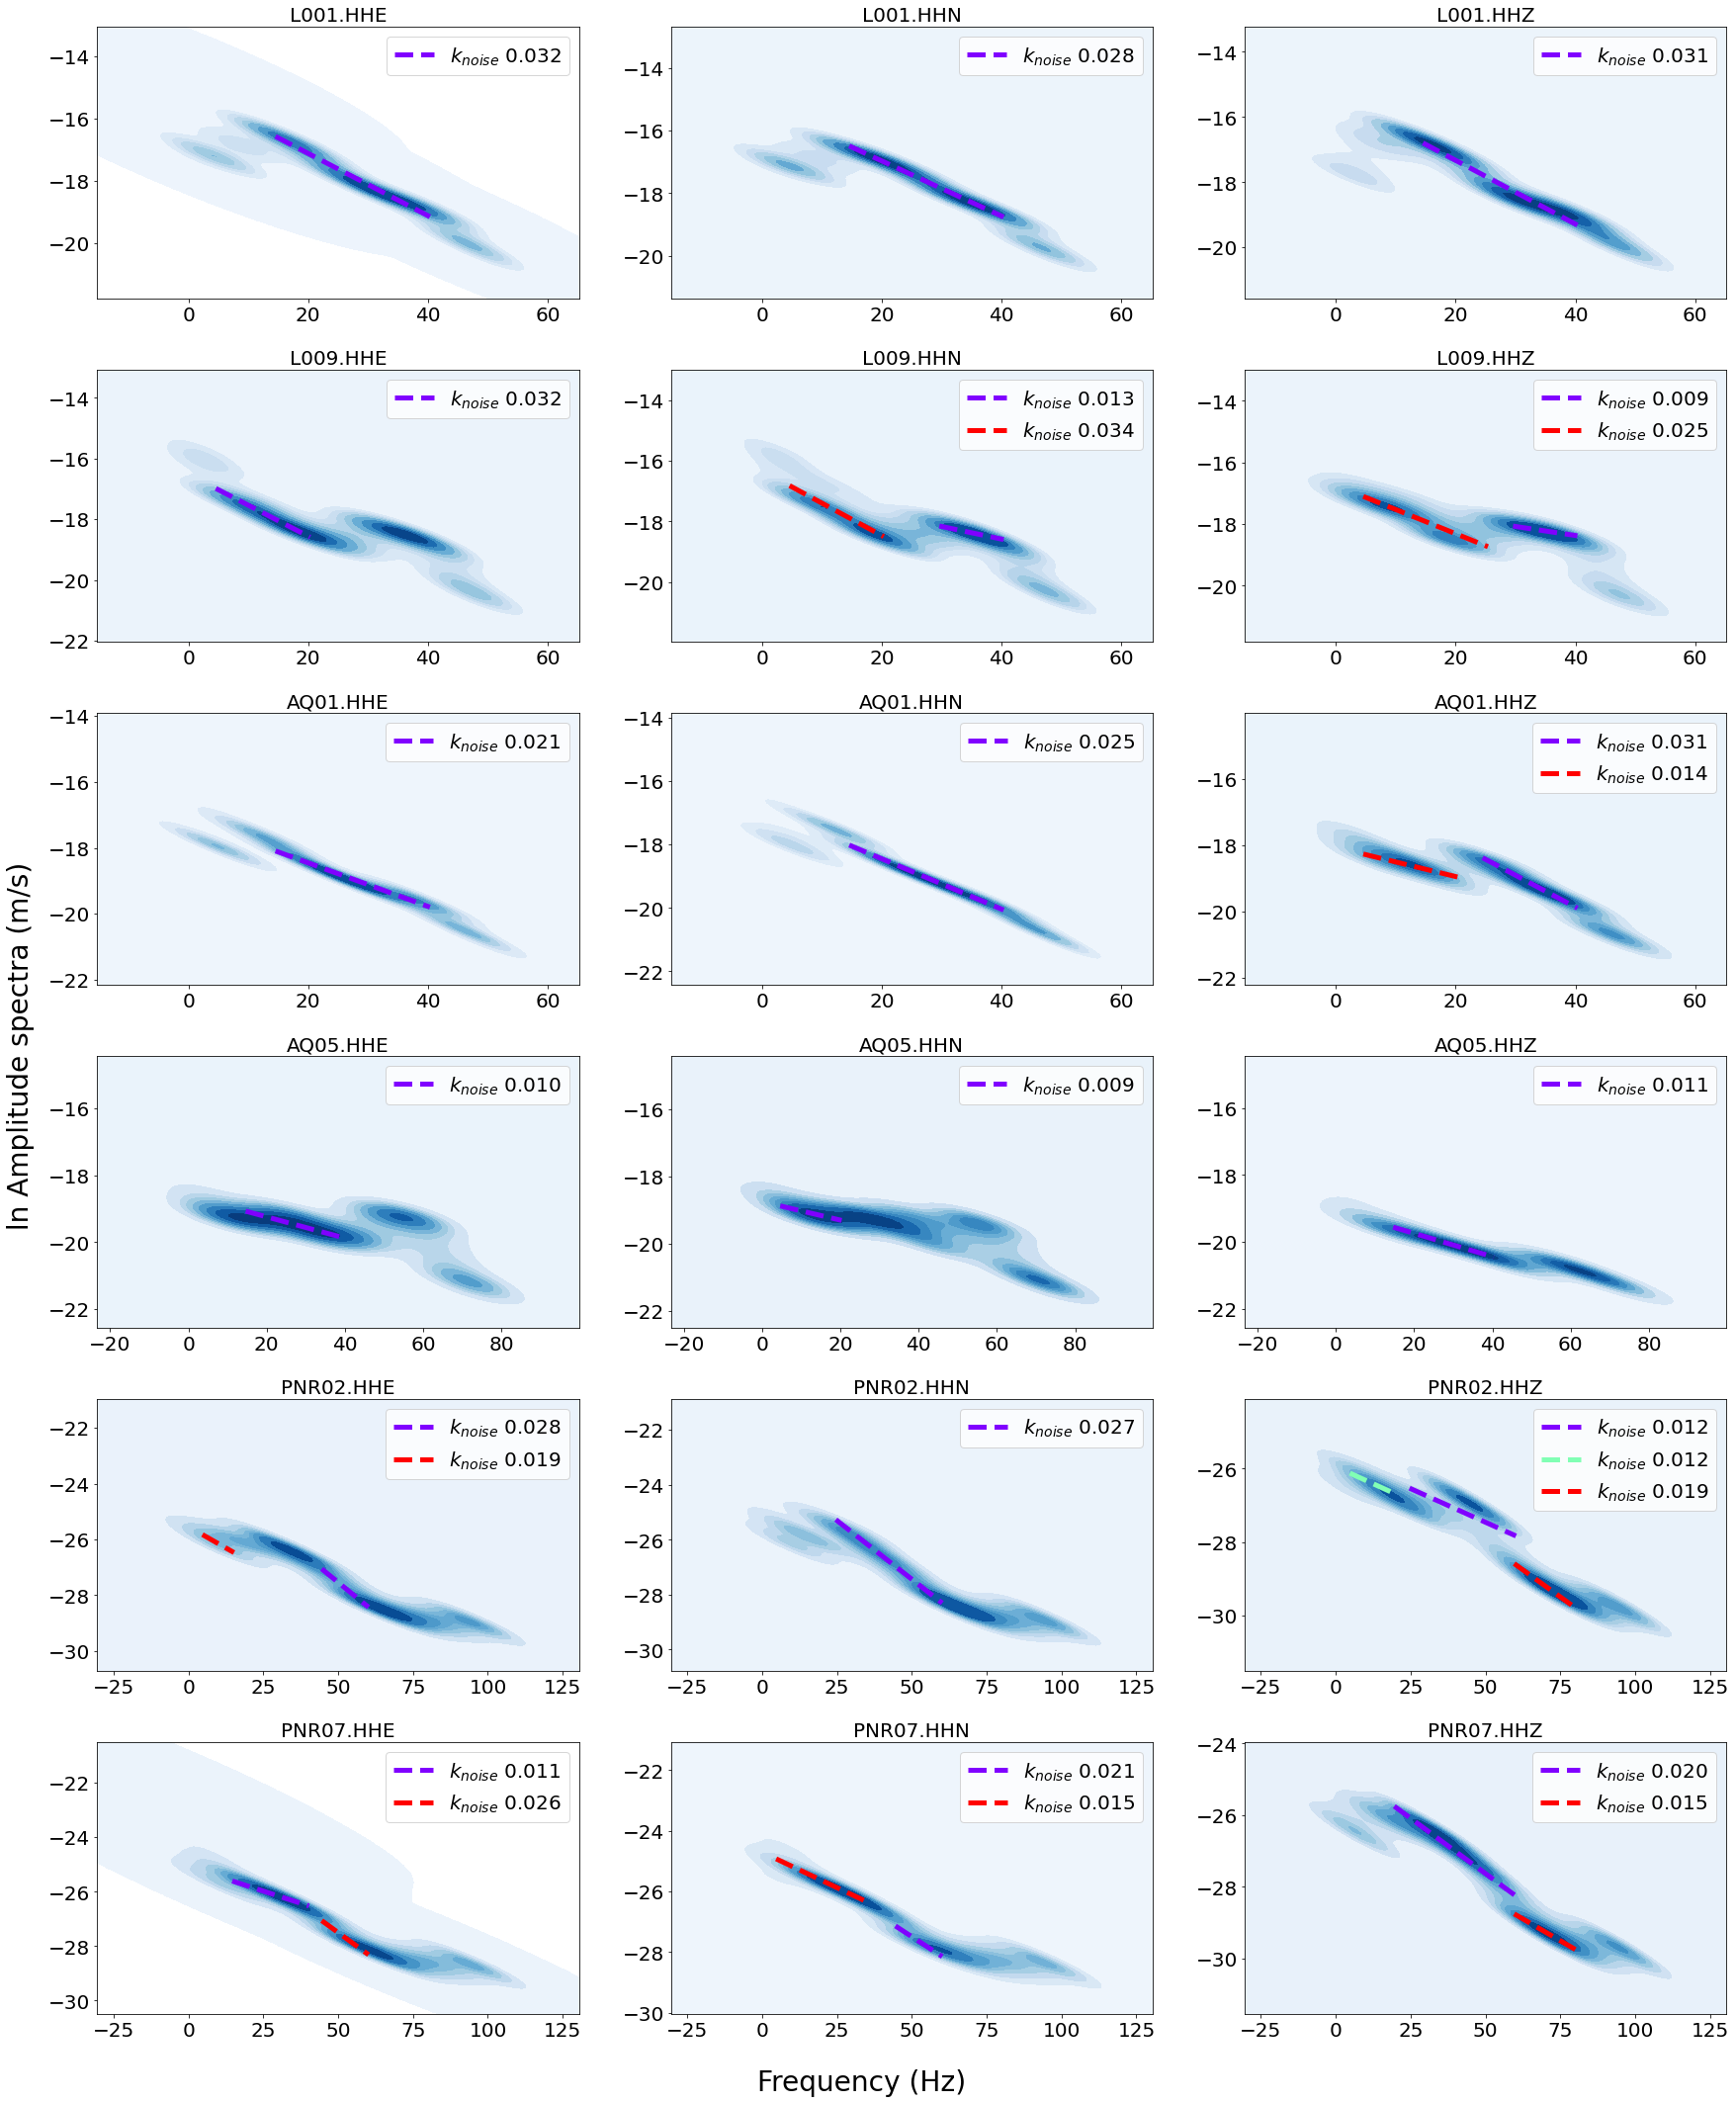

In [47]:
fig,ax = plt.subplots(nrows=6, ncols=3, figsize=(25, 30))
plt.subplots_adjust(hspace= 1,wspace = .8)


sta = ['L001','L009','AQ01','AQ05','PNR02','PNR07']
cha =['HHE','HHN','HHZ']

for row, station in enumerate(sta):
    list_sta = [f for f in os.listdir(dirsta)]
    list_sta = [f for f in list_sta if not f.startswith('.DS')]
    list_files =[f for f in list_sta if station in f]
    s =[f.split('.')[0] for f in list_files]
    c=[f.split('.')[2] for f in list_files]
    uf=[(f.split('.')[3]).split('_')[0] for f in list_files]
    lf=[(f.split('.')[3]).split('_')[1] for f in list_files]
    dc = pd.DataFrame({'filename': list_files, 'sta':s,'cha':c,'uf':uf,'lf':lf})
    dc = dc.sort_values(by=['filename'])
    newlist_cha = dc.drop_duplicates(subset=['cha'])
    newlist_cha = newlist_cha.cha
    for col in range(len(newlist_cha)):
        d = dc[dc.cha==cha[col]]
        d = d.reset_index(drop=True)
        color = iter(cm.rainbow(np.linspace(0, 1, len(d))))
        for n in range(len(d)):
            c= next(color)
            file = pd.read_csv(os.path.join(dirsta,d.filename[n]))
            nfas = file.avg_fas
            f = file.f
            coef1,poly1, x1, y1 = gradient (int(d.uf[n]), int(d.lf[n]), np.log(nfas),f)
            k = kappa(coef1[0])    
            pols=np.poly1d([-k *(np.pi),coef1[1]])
            ax[row,col].plot(x1, (pols(x1)),c=c,linestyle='--', linewidth=5.0, label='$k_{noise}$ '+"{:.3f}".format(abs(k)))
        sns.kdeplot(f, np.log(nfas), cmap="Blues", shade=True, thresh=0,ax=ax[row,col])
        ax[row,col].set(xlabel=None)
        ax[row,col].set(ylabel=None)
        ax[row,col].legend(loc='upper right',fontsize=20)
        ax[row,col].set_title(station+"."+cha[col], fontsize = 20)
        ax[row,col].tick_params(labelsize=20)
fig.supylabel(" ln Amplitude spectra (m/s)",fontsize=28)
fig.supxlabel("Frequency (Hz)",fontsize=28)
# pylab.rcParams['xtick.major.pad']='8'
plt.tight_layout(pad=2.5)
plt.show()   
fig.savefig(os.path.join(dest_dir,'figure5.png'))

In [41]:
sta


['L001', 'L009', 'AQ01', 'AQ05', 'PNR02', 'PNR07']

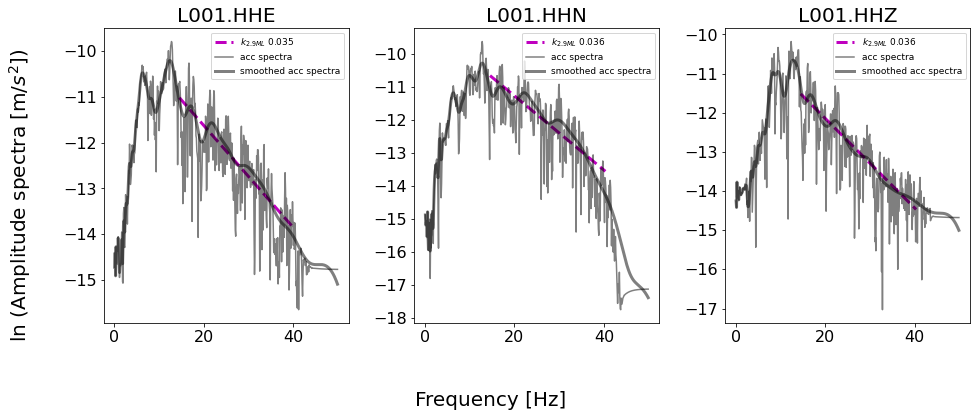

In [28]:
from obspy import read, read_inventory
from spectra import fas_psd_smooth
from gradient_to_kappa import gradient, kappa
epath ='/Users/psuroyo/Documents/BGS_2018/LARGER_ML_Pungky/2019-08-26T07:30:47.0'
nfft = 1000

pinv  = "/Users/psuroyo/Documents/Study_DataWork/PNR_TLS_Array/selected_mseed_p/Inventory/"
inv = read_inventory(os.path.join(pinv,'pnr_inventory.xml'),'stationxml')

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
plt.subplots_adjust(hspace= 1,wspace = .8)

out='VEL'
sta = ['L001']
cha =['HHE','HHN','HHZ']

for row, station in enumerate(sta):
    list_sta = [f for f in os.listdir(dirsta)]
    list_sta = [f for f in list_sta if not f.startswith('.DS')]
    list_files =[f for f in list_sta if station in f]
    s =[f.split('.')[0] for f in list_files]
    c=[f.split('.')[2] for f in list_files]
    lf=[(f.split('.')[3]).split('_')[0] for f in list_files]
    uf=[(f.split('.')[3]).split('_')[1] for f in list_files]
    dc = pd.DataFrame({'filename': list_files, 'sta':s,'cha':c,'uf':uf,'lf':lf})
    dc = dc.sort_values(by=['filename'])
    newlist_cha = dc.drop_duplicates(subset=['cha'])
    newlist_cha = newlist_cha.cha
    for col in range(len(newlist_cha)):
        d = dc[dc.cha==cha[col]]
        d = d.reset_index(drop=True)
        color = iter(cm.rainbow(np.linspace(0, 1, len(d))))
        for n in range(len(d)):
            c= next(color)
            file = pd.read_csv(os.path.join(dirsta,d.filename[n]))
            nfas = file.avg_fas
            f = file.f
            
            se = read(os.path.join(epath,'LV.L001..'+cha[col]+"*"),format='mseed')
            for tr in se:
                prefilter=[0.05,0.1,40,45]
                wl = 90
                tr.detrend("demean")
                tr.taper(max_percentage=0.05)
                tr.remove_response(inv, output='acc', pre_filt=prefilter, 
                                       zero_mean=True, taper=True, taper_fraction=0.05)
                fe, fas, psd,smooth= fas_psd_smooth(tr, nfft, smoothing='konno-ohmachi',
                                                    smoothing_count=1, smoothing_constant=40)
                nor_fas = smooth/ len(smooth)
                coef,poly1, x, y = gradient(int(d.lf), int(d.uf), np.log(nor_fas), fe)
                kr = kappa(coef[0])
                
                
                pols=np.poly1d([-kr *(np.pi),coef[1]])
                ax[col].plot(x, (pols(x)),'--m', linewidth=3.0, label='$k_{2.9ML}$ '+"{:.3f}".format(abs(kr)))
                ax[col].plot(fe, np.log(fas/len(smooth)), color='k',alpha=0.5,label ='acc spectra')
                ax[col].plot(fe, np.log(nor_fas), linewidth=3.0, color='k',alpha=0.5, label ='smoothed acc spectra')
#                 ax[0,col].set_xscale('log')
#                 llpsp = np.log(nor_fas[0])#np.log(nor_fas.max())
#                 gam =1 
#                 n =2
#                 fc = 13
#                 model =llpsp - (1/gam)*np.log10((1+(f/fc)**(gam*n)))
#                 model = np.exp(model + np.log10(np.power(2*np.pi*f,2)))
#                 ax[col].plot(fe, np.log(model),'-r', linewidth=2.0,label ='Brune model $\kappa=0.0$')
                #noise
#                 coefn,poly1n, xn, yn = gradient(int(d.lf), int(d.uf), np.log10(nfas*len(nfas)), f)
#                 kn = kappa(coefn[0])
                
#                 polsn=np.poly1d([-kn *(np.pi),coefn[1]])
#                 ax[0,col].plot(xn, (polsn(xn)),'--r', linewidth=3.0, label='$k_{noise}$ '+"{:.3f}".format(abs(kn)))
#                 ax[0,col].plot(f, np.log(nfas*len(smooth)), color='b',alpha=0.5)
                
        ax[col].set(xlabel=None)
        ax[col].set(ylabel=None)
        ax[col].legend(loc='upper right',fontsize=9)
#         ax[1,col].legend(loc='upper right',fontsize=14)
        ax[col].set_title(station+"."+cha[col], fontsize = 20)
        ax[col].tick_params(labelsize=16)
fig.supylabel(" ln (Amplitude spectra [m/$s^{2}$])",fontsize=20)
fig.supxlabel("Frequency [Hz]",fontsize=20)
# pylab.rcParams['xtick.major.pad']='8'
plt.tight_layout(pad=2.5)
plt.show()   
fig.savefig(os.path.join(dest_dir,'figure7.png'))

In [23]:
np.log(nor_fas.max())

-10.657080658485977

In [144]:

# MINIMISATION FUNCTIONS
## Source model
MODEL =(1,2)
def source(f, llpsp, fc):
    gam, n = MODEL
    loga = llpsp - (1/gam)*np.log10((1+(f/fc)**(gam*n)))
    return loga
def scale_to_motion(motion, f):
    if motion == 'displacement':
        return 0

    elif motion == 'velocity':
        return np.log10(2*np.pi*f)

    elif motion == 'acceleration':
        return np.log10(np.power(2*np.pi*f,2))
    else:
        return None
# freq independent t-star attenuation model
def t_star(f, ts):
    return -(np.pi*f*ts / np.log(10))

# freq dependent t-star attenuation


# combine models
def simple_model(f, llpsp, fc, ts, motion):
    global MOTION
    """
    Simple attenuated source model to minimise.
    """
    return source(f, llpsp, fc) + scale_to_motion(motion, f)



model = simple_model(fe,np.log(fas.min()),10,0.0,"acceleration")


In [168]:
model = -8 +(np.log10((2*np.pi*fe)**2/(1+(fe/10)**2)))

np.log(fas[0])

-8.0161961262943642

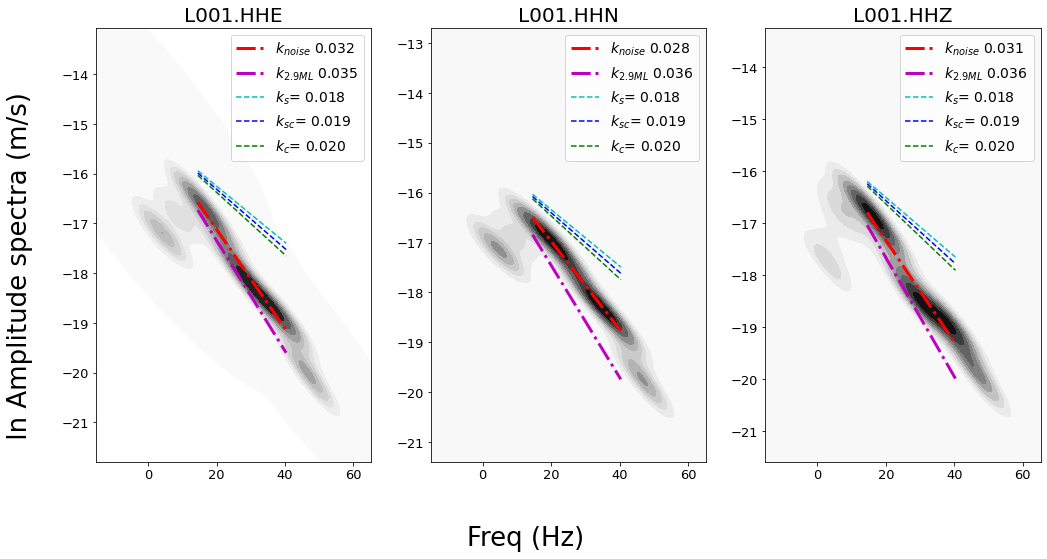

In [30]:
from obspy import read, read_inventory
from spectra import fas_psd_smooth
from gradient_to_kappa import gradient, kappa
epath ='/Users/psuroyo/Documents/BGS_2018/LARGER_ML_Pungky/2019-08-26T07:30:47.0'
nfft = 1000

pinv  = "/Users/psuroyo/Documents/Study_DataWork/PNR_TLS_Array/selected_mseed_p/Inventory/"
inv = read_inventory(os.path.join(pinv,'pnr_inventory.xml'),'stationxml')

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
plt.subplots_adjust(hspace= 1,wspace = .8)

out='VEL'
sta = ['L001']
cha =['HHE','HHN','HHZ']

for row, station in enumerate(sta):
    list_sta = [f for f in os.listdir(dirsta)]
    list_sta = [f for f in list_sta if not f.startswith('.DS')]
    list_files =[f for f in list_sta if station in f]
    s =[f.split('.')[0] for f in list_files]
    c=[f.split('.')[2] for f in list_files]
    lf=[(f.split('.')[3]).split('_')[0] for f in list_files]
    uf=[(f.split('.')[3]).split('_')[1] for f in list_files]
    dc = pd.DataFrame({'filename': list_files, 'sta':s,'cha':c,'uf':uf,'lf':lf})
    dc = dc.sort_values(by=['filename'])
    newlist_cha = dc.drop_duplicates(subset=['cha'])
    newlist_cha = newlist_cha.cha
    for col in range(len(newlist_cha)):
        d = dc[dc.cha==cha[col]]
        d = d.reset_index(drop=True)
        color = iter(cm.rainbow(np.linspace(0, 1, len(d))))
        for n in range(len(d)):
            c= next(color)
            file = pd.read_csv(os.path.join(dirsta,d.filename[n]))
            nfas = file.avg_fas
            f = file.f
            
            se = read(os.path.join(epath,'LV.L001..'+cha[col]+"*"),format='mseed')
            for tr in se:
                prefilter=[0.05,0.1,40,45]
                wl = 90
                tr.detrend("demean")
                tr.taper(max_percentage=0.05)
                tr.remove_response(inv, output='acc', pre_filt=prefilter, 
                                       zero_mean=True, taper=True, taper_fraction=0.05)
                fe, fas, psd,smooth= fas_psd_smooth(tr, nfft, smoothing='konno-ohmachi',
                                                    smoothing_count=1, smoothing_constant=40)
                nor_fase = smooth/ len(smooth)
                coefe,poly1, xe, ye = gradient(int(d.lf), int(d.uf), np.log(nor_fase), fe)
                kre = kappa(coefe[0])
                
                #                 ax[col].plot(fe, np.log(nor_fas), color='k',alpha=0.5)
                #noise
                coefn,poly1n, xn, yn = gradient(int(d.lf), int(d.uf), np.log(nfas), f)
                kn = kappa(coefn[0])
                
                polsn=np.poly1d([-kn *(np.pi),coefn[1]])
                ax[col].plot(xn, (polsn(xn)),'-.r', linewidth=3.0, label='$k_{noise}$ '+"{:.3f}".format(abs(kn)))
                
#                 ax[col].plot(f, np.log(nfas), color='b',alpha=0.5)
                
    
                polse=np.poly1d([-kre *(np.pi),coefn[1]])
                ax[col].plot(xe, (polse(xe)),'-.m', linewidth=3.0, label='$k_{2.9ML}$ '+"{:.3f}".format(abs(kre)))

                pol=np.poly1d([-0.018 *(np.pi),coefn[1]])
                polsc=np.poly1d([-0.019*(np.pi),coefn[1]])
                polc=np.poly1d([-0.020*(np.pi),coefn[1]])
                ax[col].plot(xn, (pol(xn)),'--c',label='$k_{s}$= 0.018')
                ax[col].plot(xn, (polsc(xn)),'--b',label='$k_{sc}$= 0.019')
                ax[col].plot(xn, (polc(xn)),'--g',label='$k_{c}$= 0.020')
                
                
               
        sns.kdeplot(f, np.log(nfas), cmap="Greys", shade=True, thresh=0,ax=ax[col])
        ax[col].set(xlabel=None)
        ax[col].set(ylabel=None)
        ax[col].legend(loc='upper right',fontsize=14)
        ax[col].set_title(station+"."+cha[col], fontsize = 20)
        ax[col].tick_params(labelsize=13)
fig.supylabel(" ln Amplitude spectra (m/s)",fontsize=26)
fig.supxlabel("Freq (Hz)",fontsize=26)
# pylab.rcParams['xtick.major.pad']='8'
plt.tight_layout(pad=2.5)
plt.show()   
fig.savefig(os.path.join(dest_dir,'figure8.png'))

In [62]:
d.uf

0    40
Name: uf, dtype: object

In [57]:
sta

['L001']

In [58]:
list_files

['L001..HHE.15_40.csv', 'L001..HHN.15_40.csv', 'L001..HHZ.15_40.csv']

In [59]:
d

,filename,sta,cha,uf,lf
0,L001..HHE.15_40.csv,L001,HHE,15,40
